# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_TheSevenDeadlySins_1.csv")
df.head()

,userName,score,at,content
0,Wildan Yustisi,1,2024-05-29 08:02:34,Jelek kali gaca nya temn gw bgs2
1,Polnareff Escobar,2,2024-05-29 02:08:06,"Gameplay yang membosankan, coba dong gameplay ..."
2,much. eko saputro,1,2024-05-29 01:50:26,"Bagus bgt , game netmarble bagus² tapi penyaki..."
3,RAIN,5,2024-05-28 16:46:30,Good game ever play
4,Zeee Leon,1,2024-05-28 14:40:14,Cacat rate nya udah pull berapa 3 round dapat ...


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Jelek kali gaca nya temn gw bgs2,Wildan Yustisi,2024-05-29 08:02:34
1,"Gameplay yang membosankan, coba dong gameplay ...",Polnareff Escobar,2024-05-29 02:08:06
2,"Bagus bgt , game netmarble bagus² tapi penyaki...",much. eko saputro,2024-05-29 01:50:26
3,Good game ever play,RAIN,2024-05-28 16:46:30
4,Cacat rate nya udah pull berapa 3 round dapat ...,Zeee Leon,2024-05-28 14:40:14
...,...,...,...
592,Gacor,ubay Akbar,2023-10-08 00:01:01
593,"Sangat mengecewakan, dulu download cuman 2GB s...",Abram Hamda,2023-10-07 20:03:02
594,Bagus,Arbi Yansa,2023-10-07 13:41:47
595,"Saya sudah download semua data nya, tapi kenap...",BE Toxic,2023-10-07 12:55:21


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   597 non-null    object
 1   userName  597 non-null    object
 2   at        597 non-null    object
dtypes: object(3)
memory usage: 14.1+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,597,597,597
unique,564,597,597
top,Bagus,Wildan Yustisi,2024-05-29 08:02:34
freq,7,1,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(597, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(564, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,jelek kali gaca nya temn gw bgs,Wildan Yustisi,2024-05-29 08:02:34
1,gameplay yang membosankan coba dong gameplay n...,Polnareff Escobar,2024-05-29 02:08:06
2,bagus bgt game netmarble bagus tapi penyakitny...,much. eko saputro,2024-05-29 01:50:26
3,good game ever play,RAIN,2024-05-28 16:46:30
4,cacat rate nya udah pull berapa round dapat c...,Zeee Leon,2024-05-28 14:40:14
...,...,...,...
591,gagal download file tambahan mana udah downloa...,surat dit ppdpr,2023-10-08 01:08:17
592,gacor,ubay Akbar,2023-10-08 00:01:01
593,sangat mengecewakan dulu download cuman gb sek...,Abram Hamda,2023-10-07 20:03:02
595,saya sudah download semua data nya tapi kenapa...,BE Toxic,2023-10-07 12:55:21


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,jelek kali gaca nya temn gw bgs,Wildan Yustisi,2024-05-29 08:02:34
1,gameplay yang membosankan coba dong gameplay n...,Polnareff Escobar,2024-05-29 02:08:06
2,bagus sangat game netmarble bagus tapi penyaki...,much. eko saputro,2024-05-29 01:50:26
3,good game ever play,RAIN,2024-05-28 16:46:30
4,cacat rate nya udah pull berapa round dapat c...,Zeee Leon,2024-05-28 14:40:14
...,...,...,...
591,gagal download file tambahan mana udah downloa...,surat dit ppdpr,2023-10-08 01:08:17
592,gacor,ubay Akbar,2023-10-08 00:01:01
593,sangat mengecewakan dulu download cuman gb sek...,Abram Hamda,2023-10-07 20:03:02
595,saya sudah download semua data nya tapi kenapa...,BE Toxic,2023-10-07 12:55:21


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,jelek kali gaca nya temn gw bgs,Wildan Yustisi,2024-05-29 08:02:34
1,gameplay membosankan coba dong gameplay nya ga...,Polnareff Escobar,2024-05-29 02:08:06
2,bagus sangat game netmarble bagus penyakitnya ...,much. eko saputro,2024-05-29 01:50:26
3,good game ever play,RAIN,2024-05-28 16:46:30
4,cacat rate nya udah pull berapa round cuman b...,Zeee Leon,2024-05-28 14:40:14
...,...,...,...
591,gagal download file tambahan mana udah downloa...,surat dit ppdpr,2023-10-08 01:08:17
592,gacor,ubay Akbar,2023-10-08 00:01:01
593,sangat mengecewakan dulu download cuman gb sek...,Abram Hamda,2023-10-07 20:03:02
595,sudah download semua data nya kenapa loading n...,BE Toxic,2023-10-07 12:55:21


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                [jelek, kali, gaca, nya, temn, gw, bgs]
1      [gameplay, membosankan, coba, dong, gameplay, ...
2      [bagus, sangat, game, netmarble, bagus, penyak...
3                               [good, game, ever, play]
4      [cacat, rate, nya, udah, pull, berapa, round, ...
                             ...                        
591    [gagal, download, file, tambahan, mana, udah, ...
592                                              [gacor]
593    [sangat, mengecewakan, dulu, download, cuman, ...
595    [sudah, download, semua, data, nya, kenapa, lo...
596                  [the, best, semua, segi, ini, game]
Name: content, Length: 564, dtype: object

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_TheSevenDeadlySins_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_TheSevenDeadlySins_1.csv', encoding = 'latin1')
df_clean

,content
0,jelek kali gaca nya temn gw bgs
1,gameplay bosan coba dong gameplay nya game sol...
2,bagus sangat game netmarble bagus sakit netmar...
3,good game ever play
4,cacat rate nya udah pull berapa round cuman be...
...,...
559,gagal download file tambah mana udah download gb
560,gacor
561,sangat kecewa dulu download cuman gb sekarang ...
562,sudah download semua data nya kenapa loading n...


# **Translate**

In [21]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_TheSevenDeadlySins_1.csv', encoding='latin1')

In [24]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [27]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_TheSevenDeadlySins_1.csv')

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_TheSevenDeadlySins_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,jelek kali gaca nya temn gw bgs,It's not good for me.
1,1,gameplay bosan coba dong gameplay nya game sol...,The game play is tired of trying to play a lev...
2,2,bagus sangat game netmarble bagus sakit netmar...,Good game. Netmarble. Nice netmarble.
3,3,good game ever play,good game ever play
4,4,cacat rate nya udah pull berapa round cuman be...,The rate defects are pulling. How many rounds?...
...,...,...,...
559,559,gagal download file tambah mana udah download gb,failed to download additional file which downl...
560,560,gacor,leak
561,561,sangat kecewa dulu download cuman gb sekarang ...,It was very disappointing to download only gb ...
562,562,sudah download semua data nya kenapa loading n...,It's downloaded all the data. Why did you load...


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_TheSevenDeadlySins_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,jelek kali gaca nya temn gw bgs,It's not good for me.
1,1,gameplay bosan coba dong gameplay nya game sol...,The game play is tired of trying to play a lev...
2,2,bagus sangat game netmarble bagus sakit netmar...,Good game. Netmarble. Nice netmarble.
3,3,good game ever play,good game ever play
4,4,cacat rate nya udah pull berapa round cuman be...,The rate defects are pulling. How many rounds?...
...,...,...,...
559,559,gagal download file tambah mana udah download gb,failed to download additional file which downl...
560,560,gacor,leak
561,561,sangat kecewa dulu download cuman gb sekarang ...,It was very disappointing to download only gb ...
562,562,sudah download semua data nya kenapa loading n...,It's downloaded all the data. Why did you load...


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 219
Netral = 183
Negatif = 162

Total Data Seluruhnya : 564


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,jelek kali gaca nya temn gw bgs,It's not good for me.,Negatif
1,1,gameplay bosan coba dong gameplay nya game sol...,The game play is tired of trying to play a lev...,Negatif
2,2,bagus sangat game netmarble bagus sakit netmar...,Good game. Netmarble. Nice netmarble.,Positif
3,3,good game ever play,good game ever play,Positif
4,4,cacat rate nya udah pull berapa round cuman be...,The rate defects are pulling. How many rounds?...,Positif
...,...,...,...,...
559,559,gagal download file tambah mana udah download gb,failed to download additional file which downl...,Negatif
560,560,gacor,leak,Netral
561,561,sangat kecewa dulu download cuman gb sekarang ...,It was very disappointing to download only gb ...,Negatif
562,562,sudah download semua data nya kenapa loading n...,It's downloaded all the data. Why did you load...,Negatif


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,jelek kali gaca nya temn gw bgs,It's not good for me.,Negatif
1,gameplay bosan coba dong gameplay nya game sol...,The game play is tired of trying to play a lev...,Negatif
2,bagus sangat game netmarble bagus sakit netmar...,Good game. Netmarble. Nice netmarble.,Positif
3,good game ever play,good game ever play,Positif
4,cacat rate nya udah pull berapa round cuman be...,The rate defects are pulling. How many rounds?...,Positif
...,...,...,...
559,gagal download file tambah mana udah download gb,failed to download additional file which downl...,Negatif
560,gacor,leak,Netral
561,sangat kecewa dulu download cuman gb sekarang ...,It was very disappointing to download only gb ...,Negatif
562,sudah download semua data nya kenapa loading n...,It's downloaded all the data. Why did you load...,Negatif


# **Visualisasi**


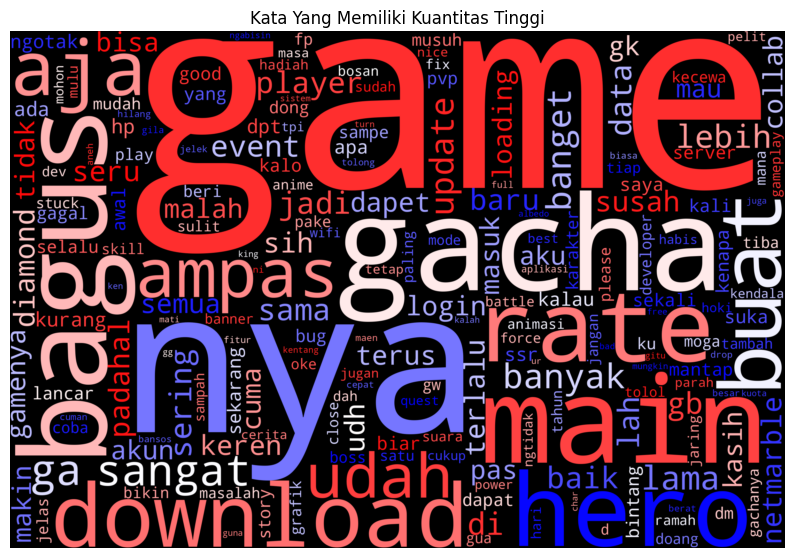

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


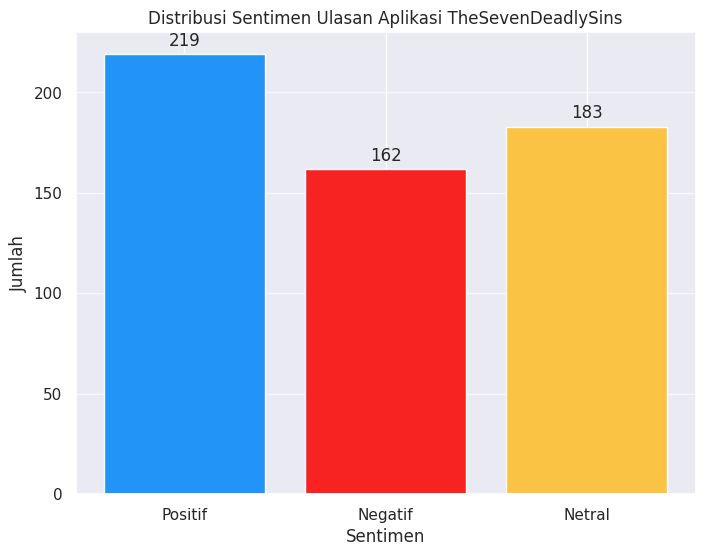

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi TheSevenDeadlySins")


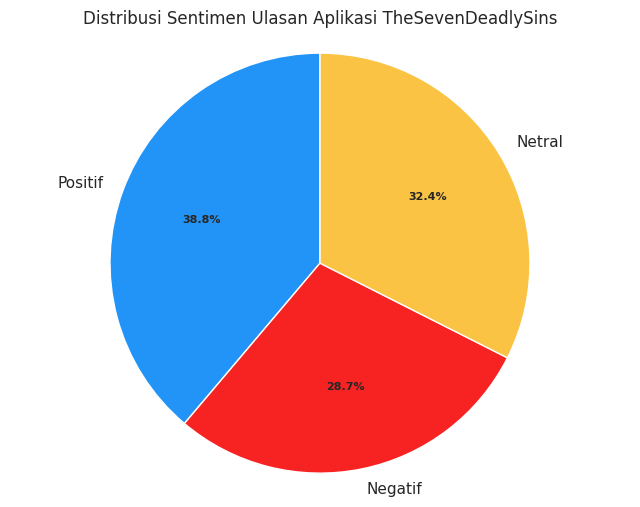

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi TheSevenDeadlySins")

In [38]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,jelek kali gaca nya temn gw bgs,It's not good for me.,Negatif
1,gameplay bosan coba dong gameplay nya game sol...,The game play is tired of trying to play a lev...,Negatif
2,bagus sangat game netmarble bagus sakit netmar...,Good game. Netmarble. Nice netmarble.,Positif
3,good game ever play,good game ever play,Positif
4,cacat rate nya udah pull berapa round cuman be...,The rate defects are pulling. How many rounds?...,Positif
...,...,...,...
558,game tutorial doang isi nya awal game mana g b...,It's a tutorial game. Just start the game. Whe...,Negatif
559,gagal download file tambah mana udah download gb,failed to download additional file which downl...,Negatif
561,sangat kecewa dulu download cuman gb sekarang ...,It was very disappointing to download only gb ...,Negatif
562,sudah download semua data nya kenapa loading n...,It's downloaded all the data. Why did you load...,Negatif


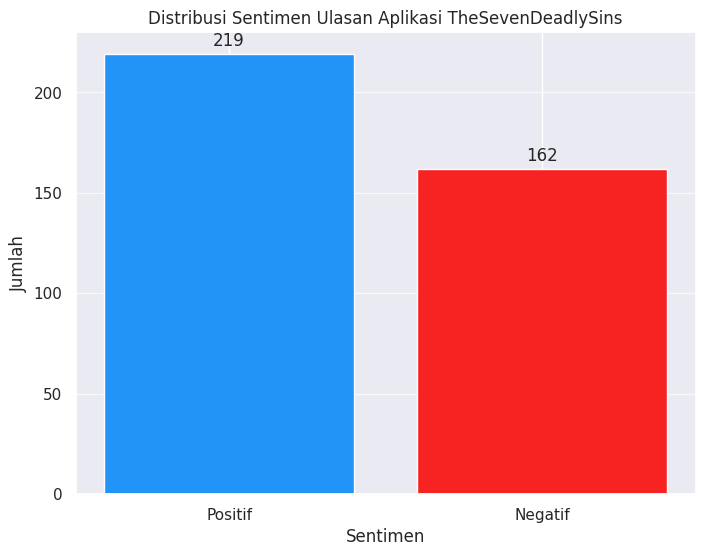

In [39]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi TheSevenDeadlySins")


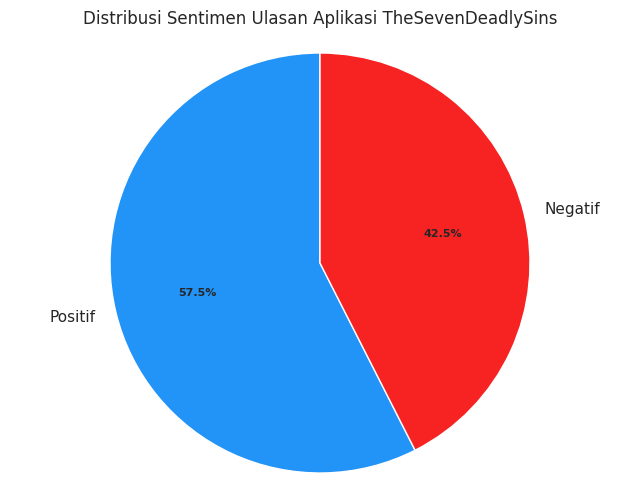

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi TheSevenDeadlySins")

In [41]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,jelek kali gaca nya temn gw bgs,It's not good for me.,0
1,gameplay bosan coba dong gameplay nya game sol...,The game play is tired of trying to play a lev...,0
2,bagus sangat game netmarble bagus sakit netmar...,Good game. Netmarble. Nice netmarble.,1
3,good game ever play,good game ever play,1
4,cacat rate nya udah pull berapa round cuman be...,The rate defects are pulling. How many rounds?...,1
...,...,...,...
558,game tutorial doang isi nya awal game mana g b...,It's a tutorial game. Just start the game. Whe...,0
559,gagal download file tambah mana udah download gb,failed to download additional file which downl...,0
561,sangat kecewa dulu download cuman gb sekarang ...,It was very disappointing to download only gb ...,0
562,sudah download semua data nya kenapa loading n...,It's downloaded all the data. Why did you load...,0


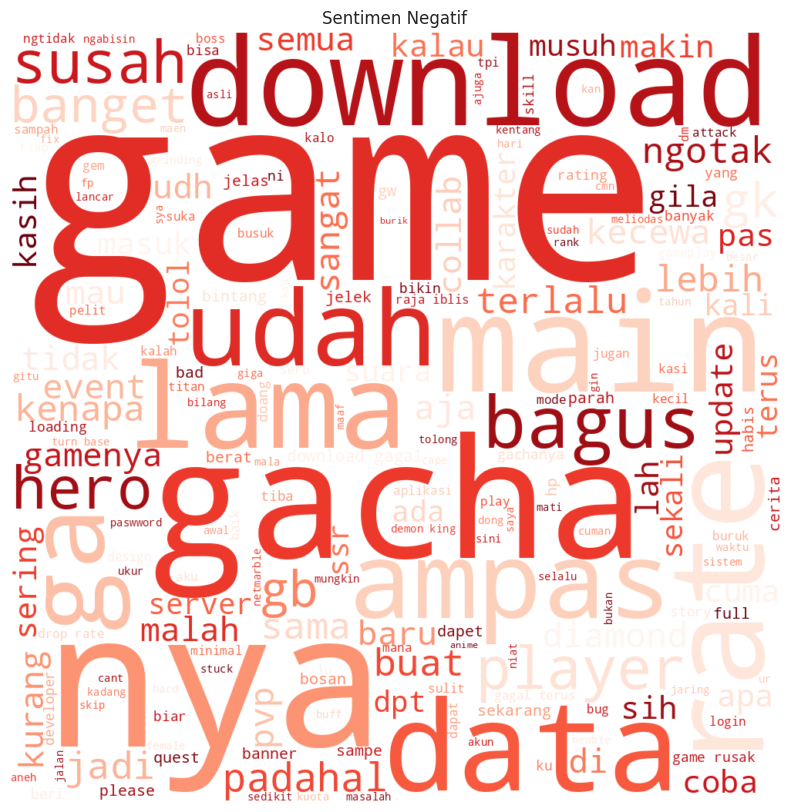

In [42]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

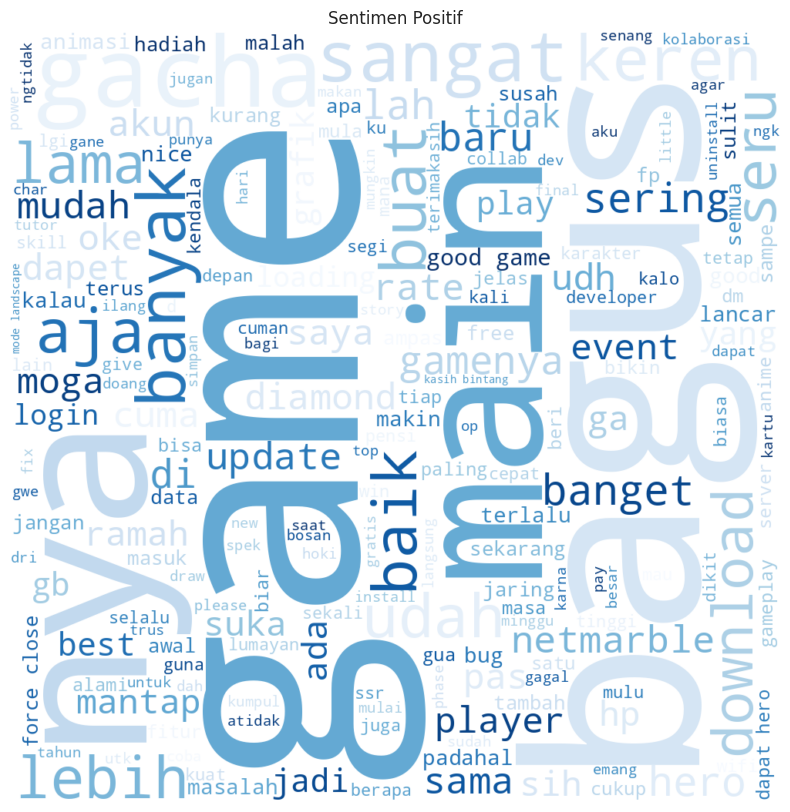

In [43]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [44]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    219
0    162
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [72]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
X_train

115    please fix the game there is a bug where the a...
394                                       very nice game
140                        gacha draw player old tingkat
559     gagal download file tambah mana udah download gb
403    udah lama main ni gamesaya suka gameplay maupu...
                             ...                        
106                                                 good
162    kasi rating nya turun update trus siegilran ga...
401    update terus beberapa bug di benerin update tr...
517    alur cerita sama persis anime nya jika game ga...
152    gameplay cerita bagus perhati game emang atida...
Name: content, Length: 304, dtype: object

In [83]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [84]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [85]:
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.44155844155844154
Akurasi untuk c = 0.05: 0.5844155844155844
Akurasi untuk c = 0.25: 0.7272727272727273
Akurasi untuk c = 0.5: 0.7272727272727273
Akurasi untuk c = 0.75: 0.7402597402597403
Akurasi untuk c = 1: 0.7402597402597403


In [87]:
linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [88]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.7402597402597403 


In [89]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.74
[[30 13]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        43
           1       0.68      0.79      0.73        34

    accuracy                           0.74        77
   macro avg       0.74      0.75      0.74        77
weighted avg       0.75      0.74      0.74        77



In [90]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[30 13]
 [ 7 27]]

True Positives (TP) =  30

True Negatives (TN) =  27

False Positives (FP) =  13

False Negatives (FN) =  7

Accuracy =  0.7402597402597403


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

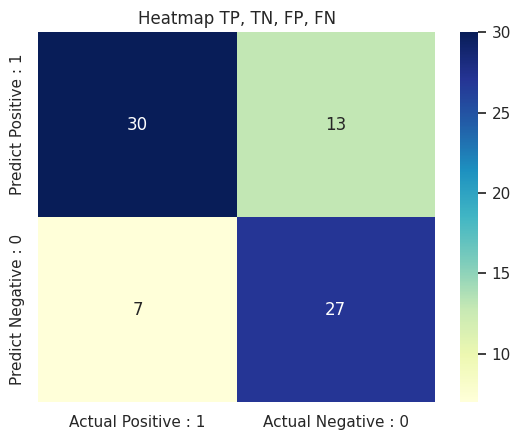

In [91]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [92]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [93]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7403


In [94]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2597


# **Testing**


In [95]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : bagus gamenya
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 97.19%
Probabilitas: 97.18857846682613 %


In [96]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : ampas bgt gachanya kontol
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 80.12%
Probabilitas: 80.12256501148359 %
